Extracted 767 frames from real not fake elon musk (1).mp4
Extracted 492 frames from deep fake elon musk (1).mp4


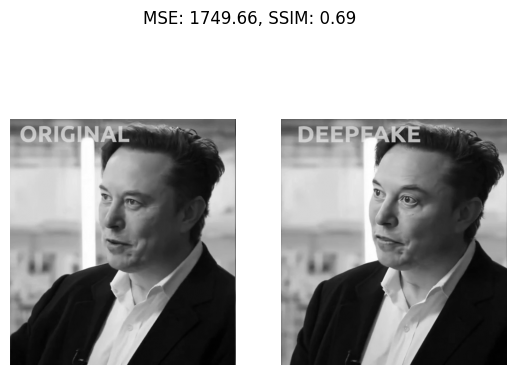

In [ ]:
# Installing the necessary libraries
!pip install mtcnn scikit-image opencv-python
# Importing all required packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path
from mtcnn.mtcnn import MTCNN
from skimage import measure
# This function extracts frames from a video and saves them to a folder
def extract_frames(video_path, output_folder):
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    count = 1

    if not cap.isOpened():
        print(f"Error opening file: {video_path}")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_filename = f"{output_folder}/{count}.jpg"
        cv2.imwrite(frame_filename, frame)
        count += 1

    cap.release()
    print(f"Extracted {count - 1} frames from {video_path}")
# These paths must exactly match the file names shown in the Colab file panel
extract_frames("real not fake elon musk (1).mp4", "extracted_real")
extract_frames("deep fake elon musk (1).mp4", "extracted_fake")
# Calculates Mean Squared Error (MSE) between two images
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Compares and displays two images using MSE and SSIM
from skimage.metrics import structural_similarity

def compare_images(imageA, imageB, title):
    m = mse(imageA, imageB)
    s = structural_similarity(imageA, imageB)

    fig = plt.figure(title)
    plt.suptitle(f"MSE: {m:.2f}, SSIM: {s:.2f}")

    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap='gray')
    plt.axis("off")

    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap='gray')
    plt.axis("off")

    os.makedirs("images", exist_ok=True)
    plt.savefig("images/comparison_output.png")
    plt.show()

# Load the frames you want to compare
real_frame = cv2.imread("extracted_real/10.jpg", 0)
fake_frame = cv2.imread("extracted_fake/10.jpg", 0)

# Resize the fake frame if dimensions don't match
if real_frame is not None and fake_frame is not None:
    if real_frame.shape != fake_frame.shape:
        fake_frame = cv2.resize(fake_frame, (real_frame.shape[1], real_frame.shape[0]))

    compare_images(real_frame, fake_frame, "Deepfake Detection Results")
else:
    print("One of the frames could not be read. Please check the file paths or frame numbers.")



